In [111]:
import pandas as pd
import numpy as np
import os
import copy
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [112]:
os.listdir("/home/matt/jupyter/agriculture_project/data")

['taipei1.csv',
 'taipei2.csv',
 'taoyuan.csv',
 'fengyuan.csv',
 'yongjing.csv',
 'xihu.csv',
 'nantou.csv',
 'xiluo.csv',
 'kaohsiung.csv',
 'fongshan.csv',
 'pingtung.csv',
 'yilan.csv',
 'banciao.csv',
 'hualien.csv',
 'taichung.csv',
 'taitung.csv',
 'sanchong.csv']

In [113]:
with open("/home/matt/jupyter/agriculture_project/data/fongshan.csv") as f:
    df = pd.read_csv(f)

In [114]:
df["product_no"].unique()

array(['FB1', 'FB2', 'FC1', 'FD1', 'FE1', 'FF1', 'FG1', 'FI1', 'FJ1',
       'FJ3', 'FK5', 'FL1', 'FR1', 'FR2', 'FT1', 'FU3', 'FV1', 'FX2',
       'FY6', 'FZ2', 'LA1', 'LA4', 'LB1', 'LB2', 'LC1', 'LC3', 'LD1',
       'LF2', 'LG2', 'LG3', 'LH1', 'LI3', 'LI5', 'LJ3', 'LJ4', 'LK1',
       'LL1', 'LN1', 'LO1', 'LZ2', 'OA1', 'OX1', 'SA1', 'SA3', 'SB2',
       'SC1', 'SD1', 'SE2', 'SE4', 'SG2', 'SG5', 'SI1', 'SO1', 'SO2',
       'SP1', 'SQ1', 'SU2', 'SW1', 'SX1', 'FH3', 'FY4', 'LK2', 'SF3',
       'SM1', 'SF1', 'FA1', 'FL6', 'FN1', 'FV5', 'LP1', 'LP2', 'SL1',
       'FG4', 'FK4', 'FU1', 'LI4', 'LJ1', 'OC1', 'OE1', 'SX2', 'FH1',
       'FN3', 'FN5', 'SG1', 'LI2', 'SS1', 'MI1', 'MX1', 'LG5', 'SB1',
       'FT4', 'FT5', 'FH4', 'LS1', 'LT2', 'SE5', 'FK3', 'FV2', 'LC5',
       'LK3', 'OE2', 'SF4', 'FZ1', 'LX1', 'SV1', 'FY7', 'FJ0', 'SF2',
       'FV3', 'LC0', 'LI1', 'MA1', 'FE2', 'FY2', 'SJ1', 'FG3', 'LG1',
       'ME1', 'MJ1', 'LM2', 'OA2', 'OB1', 'FI2', 'FP1', 'LQ1', 'LI6',
       'FM1', 'LU1',

In [134]:
table = copy.deepcopy(df)
table = table[table["product_no"] == "LG1"]
# cleaned_table = table[["avg_temp(℃)", "max_temp(℃)", "min_temp(℃)",
#            "avg_wind(m/s)", "max_wind(m/s)", "rain(mm)", "rain_time(hr)", "rain_time_max(mm/hr)",
#            "sun_time(hr)", "sun(MJ/㎡)","max_price", "middle_price", "min_price", "average_price", "volume"]]

cleaned_table = table[["avg_temp(℃)", "rain(mm)", "rain_time(hr)",
                       "max_price", "middle_price", "min_price", "average_price", "volume"]]

X = cleaned_table[["avg_temp(℃)", "rain(mm)", "rain_time(hr)"]]
# X = pd.get_dummies(cleaned_table)

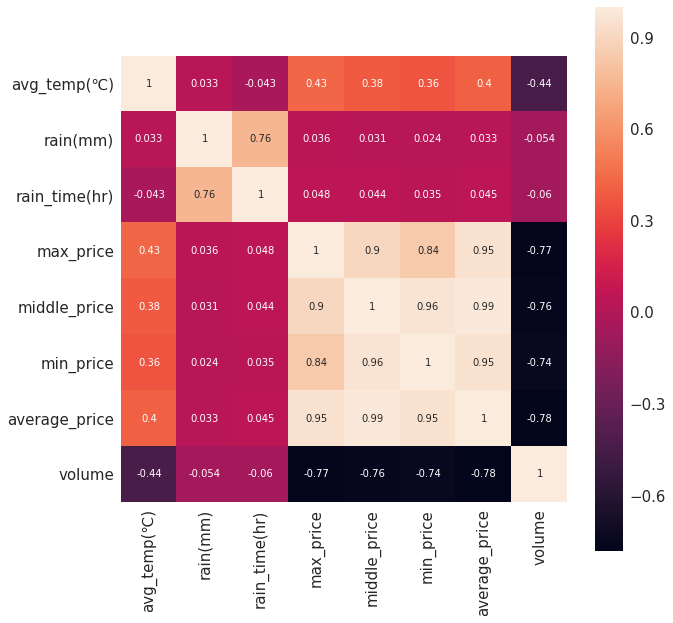

In [136]:
%matplotlib inline
cm = np.corrcoef(cleaned_table.values.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
cols = cleaned_table.columns
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                
                 annot_kws={'size': 10},
                 yticklabels=cols,
                 xticklabels=cols)

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, cleaned_table["max_price"], test_size=0.2, random_state=0)

lr = LinearRegression()
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)
print("R^2 tset:", r2_score(y_test, prediction))
print("MSE test:", mean_squared_error(y_test, prediction))

R^2 tset: 0.194534058391
MSE test: 307.209268843
